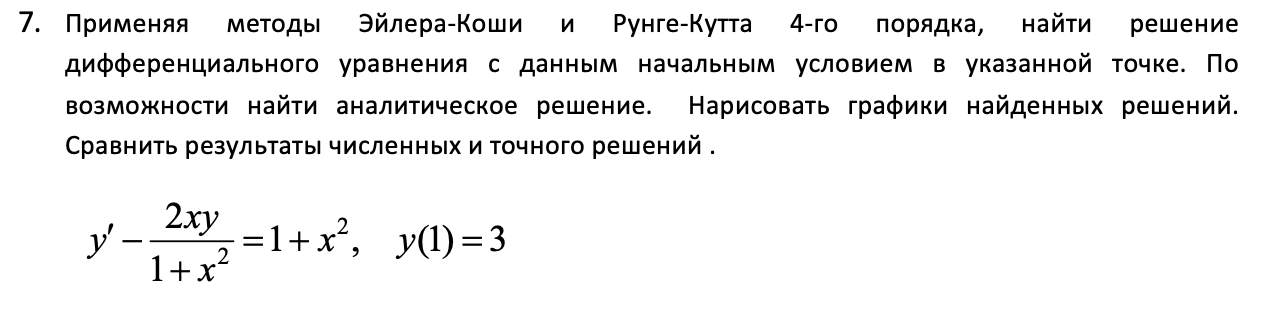

Отличие значения аналитического метода от Рунге-Кутта:
0.0000915405462365015

Отличие значения аналитического метода от Рунге-Кутта:
2.40335908744322

Графики решений:


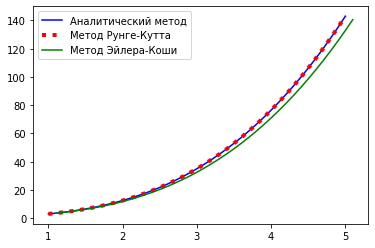

In [ ]:
import matplotlib.pyplot as plt
from sympy import *
import numpy as np


def dydx(x, y):
	return(1+x**2+(2*x*y)/(1+x**2))
 
def analitic(x0, y0, x1, h):

    x = Symbol('x')
    y = symbols('y', cls=Function)

    diffeq = (y(x).diff(x)-1-x**2-(2*x*y(x)/(1+x**2)))
    sol = dsolve(diffeq, y(x), ics={y(x0): y0})
    
    massiveX = np.arange(x0, x1+0.001, h)
    massiveY = []
    for i in massiveX:
      massiveY.append(sol.rhs.evalf(subs={x: i}))
    return massiveX, massiveY
    


def rungeKutta(x0, y0, x1, h):
    n = (int)((x1 - x0) / h)
    massiveX = []
    massiveY = []
    y = y0;
    massiveX.append(x0)
    massiveY.append(y)
    for i in range(n):
      k1 = h*dydx(x0, y)
      k2 = h*dydx(x0 + 0.5*h, y + 0.5*k1)
      k3 = h*dydx(x0 + 0.5*h, y + 0.5*k2)
      k4 = h*dydx(x0 + h, y + k3)
      y = y + (1.0/6.0)*(k1 + 2*k2 + 2*k3 + k4)
      x0 = x0 + h;
      massiveX.append(x0)
      massiveY.append(y)

    return massiveX, massiveY


def euler(x0, y, x1, h):

    massiveX = []
    massiveY = []
    while (x0 < x1):
        temp = y;
        y = y + h * dydx(x0, y);
        x0 = x0 + h;
        massiveX.append(x0)
        massiveY.append(y)
    return massiveX, massiveY

x0 = 1
y = 3
x1 = 5
h = 0.1

resultAnalitic = analitic(x0, y, x1, h)
xAnalitic = resultAnalitic[0]
yAnalitic = resultAnalitic[1]

resultKutta = rungeKutta(x0, y, x1 ,h)
xrungeKutta = resultKutta[0]
yrungeKutta = resultKutta[1]

resultEuler = euler(x0, y, x1 ,h)
xEuler = resultEuler[0]
yEuler = resultEuler[1]

plt.plot(xAnalitic, yAnalitic, 'blue')
plt.plot(xrungeKutta,yrungeKutta, 'red',  linestyle = ':', linewidth = 4)
plt.plot(xEuler,yEuler, 'green')
plt.legend(['Аналитический метод', 'Метод Рунге-Кутта', 'Метод Эйлера-Коши'])

print(f"Отличие значения аналитического метода от Рунге-Кутта:\n{abs(yAnalitic[-1]-yrungeKutta[-1])}\n")
print(f"Отличие значения аналитического метода от Рунге-Кутта:\n{abs(yAnalitic[-1]-yEuler[-1])}\n")
print("Графики решений:")
plt.show()